<a href="https://colab.research.google.com/github/surajjorwar/Machine-Learning-Tasks-/blob/main/House_Price_Prediction_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#Linear regresson and decision tree regression algorithm are used in this project
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


In [ ]:
#Loading the data set
house_df = pd.read_csv('/content/drive/MyDrive/andrew ng /house data/MagicBricks.csv')

In [ ]:
# first 5 records in dataframe
house_df.head(5)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0


for simple regression task we only need one input and one output column here we will  size in sq ft and price  as input and output columns

In [ ]:
#information about the features of data set
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1259 non-null   float64
 1   BHK          1259 non-null   int64  
 2   Bathroom     1257 non-null   float64
 3   Furnishing   1254 non-null   object 
 4   Locality     1259 non-null   object 
 5   Parking      1226 non-null   float64
 6   Price        1259 non-null   int64  
 7   Status       1259 non-null   object 
 8   Transaction  1259 non-null   object 
 9   Type         1254 non-null   object 
 10  Per_Sqft     1018 non-null   float64
dtypes: float64(4), int64(2), object(5)
memory usage: 108.3+ KB


In [ ]:
#Removing  unnecessary column
house_df = house_df[['Area', 'BHK', 'Bathroom', 'Furnishing', 'Parking', 'Price', 'Status',
       'Transaction', 'Type', 'Per_Sqft']]

In [ ]:
house_df.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Parking', 'Price', 'Status',
       'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

# **handelling null values**


In [ ]:
# Furnishing
house_df['Furnishing'].mode()

0    Semi-Furnished
Name: Furnishing, dtype: object

In [ ]:
#replacing null value with most occured value mode
house_df['Furnishing'].fillna(value = 'Semi-Furnished',inplace = True)

<ipython-input-8-8673342db350>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_df['Furnishing'].fillna(value = 'Semi-Furnished',inplace = True)


In [ ]:
house_df['Furnishing'].unique()

array(['Semi-Furnished', 'Furnished', 'Unfurnished'], dtype=object)

In [ ]:
#Bathroom
house_df['Bathroom'].mode()


0    2.0
Name: Bathroom, dtype: float64

In [ ]:
#replacing null value with most occured value mode
house_df['Bathroom'].fillna(value = 2.0,inplace = True)

In [ ]:
#Parking
house_df['Parking'].mean()

1.935562805872757

In [ ]:
house_df['Parking'].fillna(value = 2.0,inplace = True)

In [ ]:
#Type
house_df['Type'].unique()


array(['Builder_Floor', 'Apartment', nan], dtype=object)

In [ ]:
house_df['Type'].fillna(value = 'Builder_Floor',inplace = True)

In [ ]:
# checking null values
house_df['Per_Sqft'].isna().sum()

241

In [ ]:
#handelling null values by replacing with mean
house_df['Per_Sqft'].fillna(value =house_df['Per_Sqft'].mean(),inplace = True )

In [ ]:
# checking null values
house_df['Price'].isna().sum()

0

In [ ]:
#Transaction
house_df['Transaction'].mode()


0    Resale
Name: Transaction, dtype: object

In [ ]:
#replacing null value with most occured value mode
house_df['Transaction'].fillna(value ='Resale',inplace = True )

# **Scaling**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame and you want to scale certain columns
columns_to_scale = ['Area', 'BHK', 'Bathroom', 'Parking','Per_Sqft','Price']

# Create a StandardScaler instance
scaler = MinMaxScaler()

# Fit the scaler on the selected columns and transform the data
house_df[columns_to_scale] = scaler.fit_transform(house_df[columns_to_scale])

In [ ]:
house_df.head(2)

,Area,BHK,Bathroom,Furnishing,Parking,Price,Status,Transaction,Type,Per_Sqft
0,0.031806,0.222222,0.166667,Semi-Furnished,0.0,0.023013,Ready_to_move,New_Property,Builder_Floor,0.079260
1,0.029746,0.111111,0.166667,Semi-Furnished,0.0,0.016736,Ready_to_move,New_Property,Apartment,0.029702


In [ ]:
#creatig a function to detect outliers by IQR method
def outliers(df,column):
     Q1 = df[column].quantile(0.25) # First quartile
     Q3 = df[column].quantile(0.75) # Third Quartile

# interquartile range (IQR)
     IQR = Q3 - Q1

# lower and upper bounds for outliers
     lower_bound = Q1 - 1.5 * IQR
     upper_bound = Q3 + 1.5 * IQR

# values greater than upper bound and values less than lower bond is an outlier
     outliers_count = ((df[column] < lower_bound) | (df[column] > upper_bound)).sum()
     result = print( 'outliers count ' , outliers_count,'lower bound ' , lower_bound, 'upper bound' ,upper_bound)
     return result


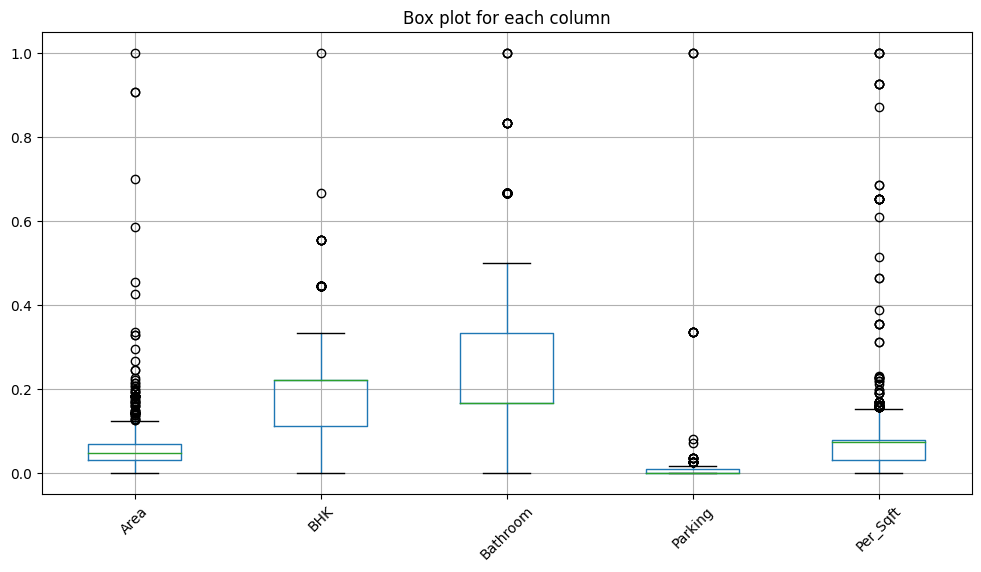

In [ ]:
#plotting box plot to see outliers
abc = house_df[['Area', 'BHK', 'Bathroom', 'Parking','Per_Sqft']]
plt.figure(figsize=(12, 6))
abc.boxplot()
plt.title('Box plot for each column')
plt.xticks(rotation=45)
plt.show()



In [ ]:
#count of outliers and upper and lower bond value
outliers(house_df,'Area')
outliers(house_df,'BHK')
outliers(house_df,'Bathroom')
outliers(house_df,'Parking')

outliers count  67 lower bound  -0.023813447593935395 upper bound 0.12450560316413974
outliers count  35 lower bound  -0.05555555555555555 upper bound 0.38888888888888884
outliers count  67 lower bound  -0.0833333333333334 upper bound 0.5833333333333335
outliers count  35 lower bound  -0.01327433628318584 upper bound 0.022123893805309734


In [ ]:
def remove_outliers(data, colm):
    q1 = data[colm].quantile(0.25)
    q3 = data[colm].quantile(0.75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    data = data[(data[colm] >= lower_bound) & (data[colm] <= upper_bound)]
    return data


In [ ]:
house_df = remove_outliers(house_df,'Bathroom')
house_df = remove_outliers(house_df,'Area')
house_df = remove_outliers(house_df,'Parking')
house_df = remove_outliers(house_df,'BHK')
house_df = remove_outliers(house_df,'Per_Sqft')

house_df = remove_outliers(house_df,'Bathroom')
house_df = remove_outliers(house_df,'Area')
house_df = remove_outliers(house_df,'Parking')
house_df = remove_outliers(house_df,'BHK')
house_df = remove_outliers(house_df,'Per_Sqft')

In [ ]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1039 entries, 0 to 1257
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1039 non-null   float64
 1   BHK          1039 non-null   float64
 2   Bathroom     1039 non-null   float64
 3   Furnishing   1039 non-null   object 
 4   Parking      1039 non-null   float64
 5   Price        1039 non-null   float64
 6   Status       1039 non-null   object 
 7   Transaction  1039 non-null   object 
 8   Type         1039 non-null   object 
 9   Per_Sqft     1039 non-null   float64
dtypes: float64(6), object(4)
memory usage: 89.3+ KB


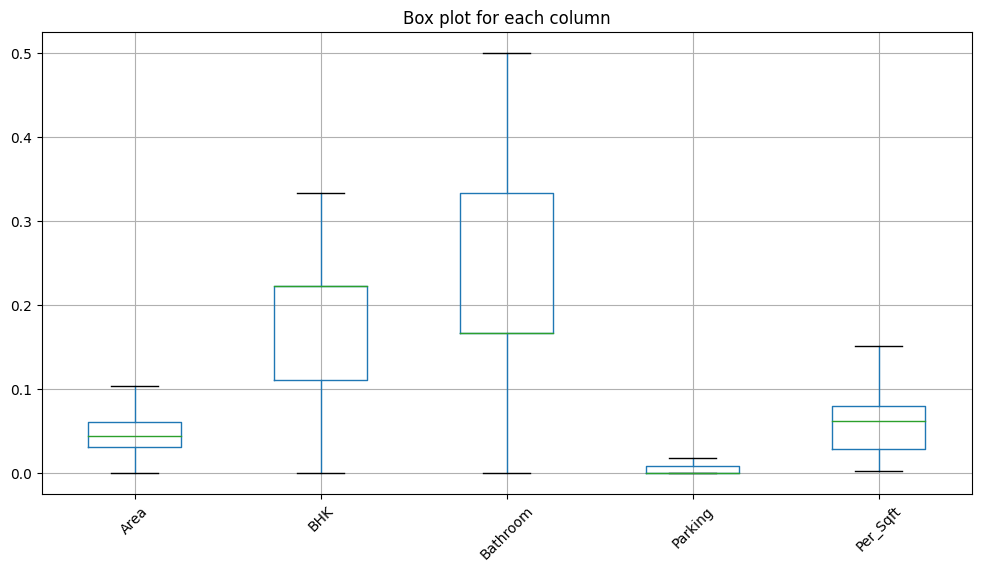

In [ ]:
#checking if outliers are removed or not
abc = house_df[['Area', 'BHK', 'Bathroom', 'Parking','Per_Sqft']]
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
abc.boxplot()
plt.title('Box plot for each column')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
#splitting the data
x = house_df.drop(columns = ['Price'])
y = house_df['Price'].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test , y_train , y_test  = train_test_split(x,y,test_size = 0.2,random_state = 42 )


# **Converting categorical column to numerical **

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1039 entries, 0 to 1257
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         1039 non-null   float64
 1   BHK          1039 non-null   float64
 2   Bathroom     1039 non-null   float64
 3   Furnishing   1039 non-null   object 
 4   Parking      1039 non-null   float64
 5   Status       1039 non-null   object 
 6   Transaction  1039 non-null   object 
 7   Type         1039 non-null   object 
 8   Per_Sqft     1039 non-null   float64
dtypes: float64(5), object(4)
memory usage: 81.2+ KB


In [ ]:
x.columns

Index(['Area', 'BHK', 'Bathroom', 'Furnishing', 'Parking', 'Status',
       'Transaction', 'Type', 'Per_Sqft'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(drop = 'first',sparse_output  = False, dtype = np.int32)

In [ ]:
X_train_new = ohe.fit_transform(X_train[['Furnishing','Status','Transaction','Type']])
X_test_new = ohe.fit_transform(X_test[['Furnishing','Status','Transaction','Type']])

In [ ]:
a = np.hstack((X_train[['Area', 'BHK', 'Bathroom',  'Parking', 'Per_Sqft']].values,X_train_new))

In [ ]:
import pandas as pd

original_columns = ['Area', 'BHK', 'Bathroom', 'Parking',  'Per_Sqft']

# Concatenate original features with encoded features
combined_data = np.hstack((X_train[original_columns].values, X_train_new))
combined_data1 = np.hstack((X_test[original_columns].values, X_test_new))

# Column names for the combined DataFrame
combined_columns = original_columns + list(ohe.get_feature_names_out(['Furnishing', 'Status', 'Transaction','Type']))
combined_columns1 = original_columns + list(ohe.get_feature_names_out(['Furnishing', 'Status', 'Transaction','Type']))

# Create DataFrame from combined data
X_train_combined = pd.DataFrame(combined_data, columns=combined_columns)
X_test_combined = pd.DataFrame(combined_data1, columns=combined_columns1)




In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def regression_metrics(y_test, y_pred):

    #Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, y_pred)

    # Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    #Root Mean Squared Error (RMSE)
    rmse = np.sqrt(mse)


    # R^2 score
    r2 = r2_score(y_test, y_pred)

    metrics = {
        'MAE': mae,
        'MSE': mse,
        'RMSE': rmse,
        'R2': r2
    }

    return metrics


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
# Linear Regression
model = LinearRegression()
model.fit(X_train_combined, y_train)

# Make predictions
LR = model.predict(X_test_combined)
regression_metrics(y_test,LR)

{'MAE': 0.020415750336495876,
 'MSE': 0.000779941506894155,
 'RMSE': 0.027927432873326455,
 'R2': 0.6847748791198642}

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'max_depth': [None , 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Creating the grid search
grid_search = GridSearchCV(DecisionTreeRegressor  (), param_grid, cv=5)
grid_search.fit(X_train_combined, y_train)

#best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

best_model = grid_search.best_estimator_


Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [ ]:
# Decision Tree Regression
model =DecisionTreeRegressor(max_depth =10,min_samples_split = 2,min_samples_leaf = 10)
model.fit(X_train_combined, y_train)


# Make predictions
DT = model.predict(X_test_combined)
# Evaluate performance
regression_metrics(y_test ,DT )

{'MAE': 0.01685306136919513,
 'MSE': 0.0007221714857574547,
 'RMSE': 0.026873248515158245,
 'R2': 0.7081235042861046}

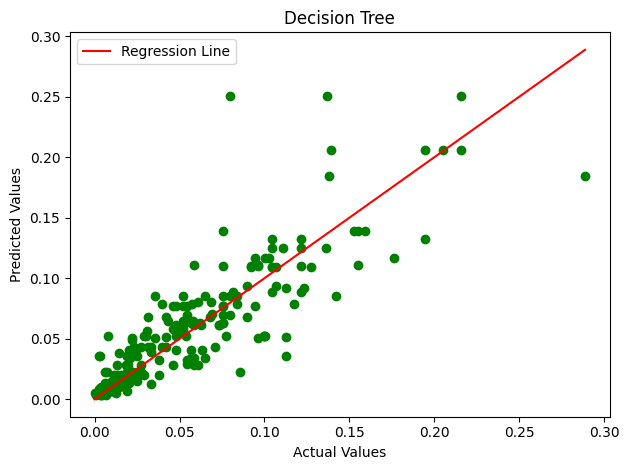

In [ ]:
# visualizing  regression line
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# Plot Decision Tree
plt.scatter(y_test, DT, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree')
plt.legend()

plt.tight_layout()
plt.show()


#The model demonstrates  low errors (MAE, MSE, RMSE), indicating good accuracy in predicting the target variable.


#R2 score indicates that the model explains approximately 70.8% of the variance in the target variable, suggesting a moderately good fit to the data.

#Batch gradient descent implementation


In [ ]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [ ]:
import numpy as np
from sklearn.metrics import r2_score

class LinearRegressionBGD:
    def __init__(self, learning_rate=0.001, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta = None
        self.cost_history = None

    def fit(self, X, y):
        # Normalize features
        X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

        # Add bias term (intercept)
        X_normalized = np.hstack((np.ones((X_normalized.shape[0], 1)), X_normalized))

        # Initialize coefficients
        self.theta = np.zeros((X_normalized.shape[1], 1))
        self.cost_history = []

        m = X_normalized.shape[0]

        # Batch gradient descent
        for _ in range(self.num_iterations):
            predictions = np.dot(X_normalized, self.theta)
            error = predictions - y
            gradient = (1 / m) * np.dot(X_normalized.T, error)
            self.theta -= self.learning_rate * gradient
            cost = (1 / (2 * m)) * np.sum(np.square(error))
            self.cost_history.append(cost)

    def predict(self, X):
        # Normalize features
        X_normalized = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

        # Add bias term (intercept)
        X_normalized = np.hstack((np.ones((X_normalized.shape[0], 1)), X_normalized))

        return np.dot(X_normalized, self.theta)



In [ ]:
# Create an instance of LinearRegressionBGD
model = LinearRegressionBGD(learning_rate=0.5, num_iterations=1000)

# Fit the model
model.fit(X_train_combined, y_train)

# Get predictions
predictions_train = model.predict(X_train_combined)
predictions_test = model.predict(X_test_combined)
regression_metrics(y_test, predictions_test)



{'MAE': 0.020958073315944792,
 'MSE': 0.0008141634134604792,
 'RMSE': 0.028533548911070968,
 'R2': 0.6709435795432124}

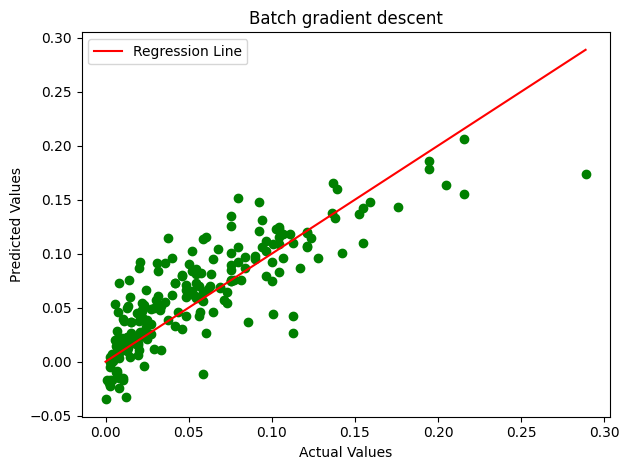

In [ ]:
plt.scatter(y_test, predictions_test, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Batch gradient descent')
plt.legend()

plt.tight_layout()
plt.show()

# polynomial regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


# Define polynomial degree
degree = 2

# Transform features to polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train_combined)
X_test_poly = poly_features.transform(X_test_combined)

# Fit linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_train_poly, y_train)

# Predict on training data
y_train_pred = lin_reg.predict(X_train_poly)

# Predict on test data
y_test_pred = lin_reg.predict(X_test_poly)

# Compute and print regression metrics
regression_metrics(y_train, y_train_pred)

{'MAE': 0.01807558465943251,
 'MSE': 0.0007848867256993006,
 'RMSE': 0.02801582991273506,
 'R2': 0.7719393219134784}

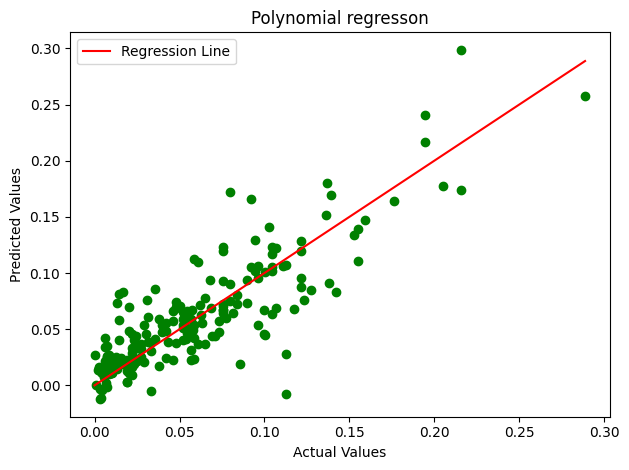

In [ ]:
plt.scatter(y_test, y_test_pred, color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', label='Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Polynomial regresson')
plt.legend()

plt.tight_layout()
plt.show()